# First let's import, then look for the assignment below

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.LangDef   import *  #-- mainly for nthnumeric
from jove.Def_md2mc import *  #-- for md2mc
from jove.Def_DFA   import *  #-- for all DFA functions
from jove.DotBashers import * #-- for dotObj_dfa
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 22.28 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_

# Task 1: Define DFA Even010

<font size="4">    
Using Jove's markdown, define a DFA for the language of strings over alphabet $\{0,1\}$ that accepts an even number of NON-OVERLAPPING occurrences of $010$s. Thoroughly document your construction!
    
HERE ARE EXAMPLES :

* 01010 - does NOT have an even number of 0's because we wanted NON-OVERLAPPING

* 0101010 - has two NON-OVERLAPPING occurrences of 010 -- that is what we want!

* 0101111010 - has two NON-OVERLAPPING occurrences of 010

* 111111 - has ZERO occurrences of 010
    
</font>

### Hint: Name states to remember the essence of the history of inputs so far. If you do so, and also keep the sense of where the machine is (in an I state, an IF state or an F state), then you'll have the solution fall out automatically!

Please read the Jove_User_Manual and heed the advice given there regarding how to write your automaton markdowns, how to place comments, how to group the lines of a DFA per state, and how to order which transition you may first consider.


In [6]:
Even010 = md2mc('''
DFA 

!! Before we reach state c we can return at any point. Once we reach point C that means that there has been 1 010. After that we need to find an additional 010 before we can return.
!! After the second 010 we can return at any point until another 010 occurs. At that point we travel back to c and it loop thereafter.

 IF : 0 -> FA
 IF : 1 -> IF
 FA : 1 -> FB
 FA : 0 -> FA
 FB : 0 -> C
 FB : 1 -> IF
 C : 0 -> D
 C : 1 -> C
 D : 0 -> D
 D : 1 -> E
 E : 0 -> F
 E : 1 -> C
 F : 1 -> F
 F : 0 -> FG
 FG : 1 -> FH
 FG : 0 -> FG
 FH : 0 -> C
 FH : 1 -> F 
''')

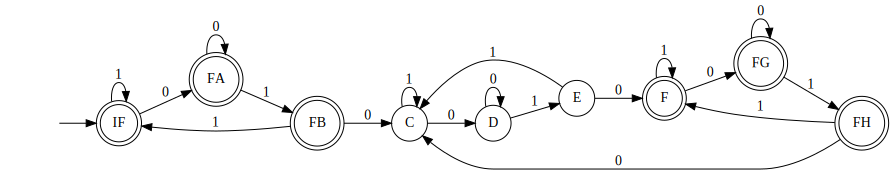

In [3]:
dotObj_dfa(Even010)

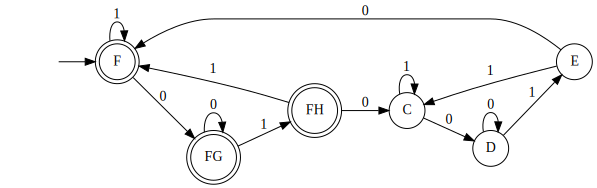

In [5]:
dotObj_dfa(min_dfa(Even010))

The minimum dfa is much less than our original dfa. This means that F, FG, and FH are equivelant to IF, FA, and FB. 

# Task 2: Define DFA Ends010

<font size="4">    
3. Using Jove's markdown, define a DFA for the language of strings over alphabet $\{0,1\}$ that ends in a $010$, calling it Ends010. Then obtain the intersection with the Even010 machine using intersect_dfa. 
    
    Call the intersection Even010_Ends010.
    
    Next, minimize Even010_Ends010, storing it in min_Even010_Ends010 .
    
    Again, document the construction thoroughly.
    
</font>

### Hint: Define a machine for "ends $010$" as illustrated by DFA Even010, and negate.

In [7]:
Ends010 =  md2mc('''
DFA

I : 1 -> I
I : 0 -> A
A : 1 -> B
A : 0 -> A
B : 0 -> F
B : 1 -> I
F : 1 -> I
F : 0 -> A

''')

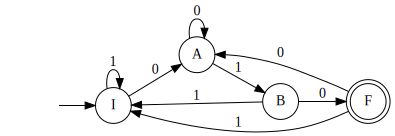

In [8]:
# Let's see the "Ends010" machine
dotObj_dfa(Ends010, FuseEdges=True)

## Obtain the intersection of Even010 and Ends010

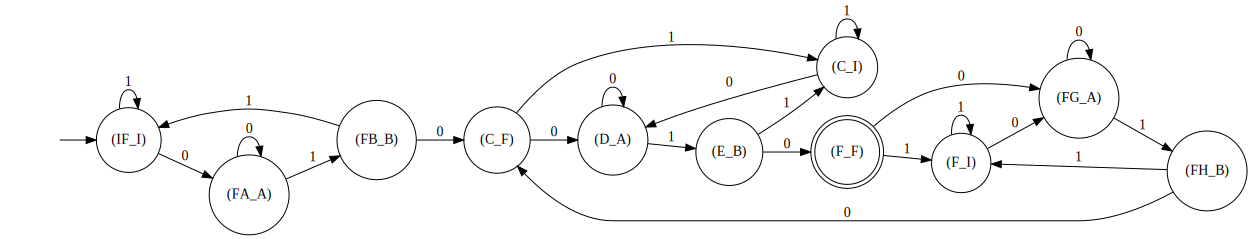

In [9]:
Even010_Ends010 = intersect_dfa(Even010, Ends010)
dotObj_dfa(Even010_Ends010)

## Minimize the intersection of Even010 and Ends010

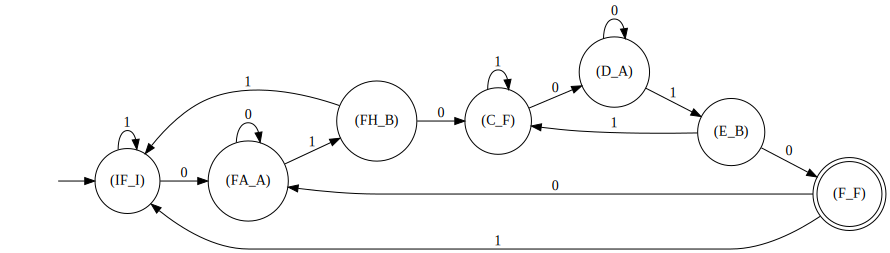

In [10]:
min_Even010_Ends010 = min_dfa(Even010_Ends010)
dotObj_dfa(min_Even010_Ends010)

# Task 3: Examine Why Minimization Implies Elimination
<font size="4">    
    
Find out which states were eliminated in the Minimization Process. Explain why it was OK to leave these states out. Test the constructed machine using the template given to you. Finally use the Python "filter" function that filters out the accepted strings.
    
</font>

## Find out which states were eliminated

In [16]:
# Hint: You can obtain the components of a DFA D by using the notation D["Q"] where
# D is a DFA created using the md2mc command. Basically, "D" is a dictionary and 
# D["Q"] obtains the value of the key at "Q". See the lecture slides for Lec-3.
Even010["Q"] - Even010_Ends010["Q"] 

{'C', 'D', 'E', 'F', 'FA', 'FB', 'FG', 'FH', 'IF'}

## Explain why it is OK to leave these states out

It seems that the intersection function changed the names of all the states to be surrouned by parenthesis. This is likely because the original Even 010's dfa wasn't minimized. If we instead compare the intersection of the minimized forms of both DFA we can see a different result.

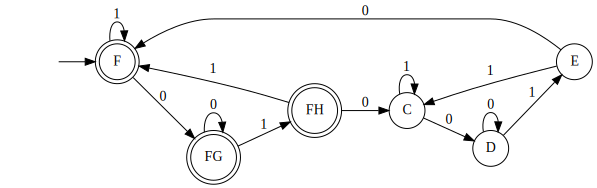

In [44]:
dotObj_dfa(min_dfa(Even010))

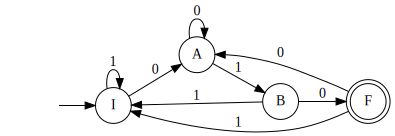

In [45]:
dotObj_dfa(min_dfa(Ends010))

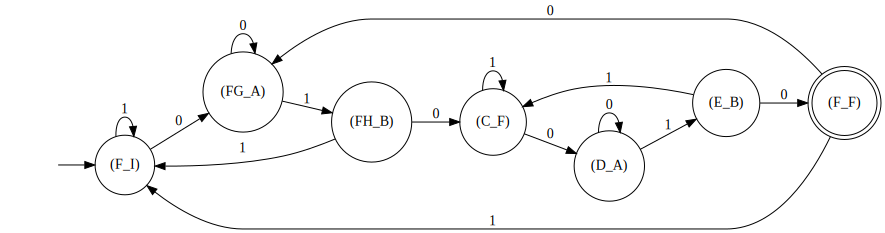

In [43]:
min_Even010_Ends010 = min_dfa(intersect_dfa(min_dfa(Even010), min_dfa(Ends010)))
dotObj_dfa(min_Even010_Ends010)

In this way we can see that now states from Even010s were removed. The first three states were merely changed to not be marked as final states. 

# Testing the machine

In [ ]:
help(nthnumeric)

## Test the constructed machine the "direct" way

In [11]:
TestList = [ nthnumeric(i, ['0','1']) for i in range(256) ]

In [12]:
TestList

['',
 '0',
 '1',
 '00',
 '01',
 '10',
 '11',
 '000',
 '001',
 '010',
 '011',
 '100',
 '101',
 '110',
 '111',
 '0000',
 '0001',
 '0010',
 '0011',
 '0100',
 '0101',
 '0110',
 '0111',
 '1000',
 '1001',
 '1010',
 '1011',
 '1100',
 '1101',
 '1110',
 '1111',
 '00000',
 '00001',
 '00010',
 '00011',
 '00100',
 '00101',
 '00110',
 '00111',
 '01000',
 '01001',
 '01010',
 '01011',
 '01100',
 '01101',
 '01110',
 '01111',
 '10000',
 '10001',
 '10010',
 '10011',
 '10100',
 '10101',
 '10110',
 '10111',
 '11000',
 '11001',
 '11010',
 '11011',
 '11100',
 '11101',
 '11110',
 '11111',
 '000000',
 '000001',
 '000010',
 '000011',
 '000100',
 '000101',
 '000110',
 '000111',
 '001000',
 '001001',
 '001010',
 '001011',
 '001100',
 '001101',
 '001110',
 '001111',
 '010000',
 '010001',
 '010010',
 '010011',
 '010100',
 '010101',
 '010110',
 '010111',
 '011000',
 '011001',
 '011010',
 '011011',
 '011100',
 '011101',
 '011110',
 '011111',
 '100000',
 '100001',
 '100010',
 '100011',
 '100100',
 '100101',
 '100110'

In [ ]:
help(accepts_dfa)

In [13]:
for test in TestList:
    if accepts_dfa(min_Even010_Ends010, test):
        print(" min_Even010_Ends010 : accepts ", test)
    else:
        print(" min_Even010_Ends010 : does not accept ", test)

 min_Even010_Ends010 : does not accept  
 min_Even010_Ends010 : does not accept  0
 min_Even010_Ends010 : does not accept  1
 min_Even010_Ends010 : does not accept  00
 min_Even010_Ends010 : does not accept  01
 min_Even010_Ends010 : does not accept  10
 min_Even010_Ends010 : does not accept  11
 min_Even010_Ends010 : does not accept  000
 min_Even010_Ends010 : does not accept  001
 min_Even010_Ends010 : does not accept  010
 min_Even010_Ends010 : does not accept  011
 min_Even010_Ends010 : does not accept  100
 min_Even010_Ends010 : does not accept  101
 min_Even010_Ends010 : does not accept  110
 min_Even010_Ends010 : does not accept  111
 min_Even010_Ends010 : does not accept  0000
 min_Even010_Ends010 : does not accept  0001
 min_Even010_Ends010 : does not accept  0010
 min_Even010_Ends010 : does not accept  0011
 min_Even010_Ends010 : does not accept  0100
 min_Even010_Ends010 : does not accept  0101
 min_Even010_Ends010 : does not accept  0110
 min_Even010_Ends010 : does not acce

## Use Python's "filter" function to filter out the accepted strings directly

In [14]:
list(filter(lambda x: accepts_dfa(min_Even010_Ends010, x), TestList))

['010010', '0010010', '0100010', '0101010', '1010010']

## Doubled the testing range; now finding at least ten strings!

In [15]:
list(filter(lambda x: accepts_dfa(min_Even010_Ends010, x), [ nthnumeric(i, ['0','1']) for i in range(512) ]))

['010010',
 '0010010',
 '0100010',
 '0101010',
 '1010010',
 '00010010',
 '00100010',
 '00101010',
 '01000010',
 '01010010',
 '01011010',
 '10010010',
 '10100010',
 '10101010',
 '11010010']

# END